In [56]:
import pandas as pd

In [57]:
df=pd.read_csv("home_price_prediction\model\Bengaluru_House_Data.csv")
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [58]:
def con_float(x):
    a=x.split('-')
    if len(a)==2:
        return (float(a[0])+float(a[1]))/2
    try: 
        return float(x)
    except:
        return None    

In [59]:
df['total_sqft']=df['total_sqft'].apply(con_float)

In [60]:
df=df[df['total_sqft'].notnull()]
df['total_sqft'].isnull().sum()

0

In [61]:
df['pps']=(df['price']*100000)/df['total_sqft']

In [62]:
df['pps'].describe()

count    1.327400e+04
mean     7.907501e+03
std      1.064296e+05
min      2.678298e+02
25%      4.266865e+03
50%      5.434306e+03
75%      7.311746e+03
max      1.200000e+07
Name: pps, dtype: float64

In [63]:
low_lim=df.pps.quantile(0.001)
low_lim

1189.4166666666667

In [64]:
upp_lim=df.pps.quantile(0.999)
upp_lim

50903.23232323291

In [67]:
df.shape

(13274, 10)

In [66]:
df1 = df[(df.pps<upp_lim) & (df.pps>low_lim)]
df1.shape

(13246, 10)

In [71]:
import matplotlib.pyplot as plt

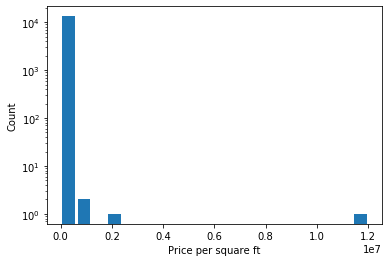

In [85]:
plt.hist(df.pps, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

### Removing using std

In [75]:
std=df1.pps.std()
mean=df1.pps.mean()
std,mean

(4135.861156142753, 6657.916892666242)

In [76]:
min_lim=mean-4*std
max_lim=mean+4*std

min_lim,max_lim

(-9885.527731904771, 23201.361517237256)

In [81]:
df2 = df1[(df1.pps<max_lim) & (df1.pps>min_lim)]

In [82]:
df2.shape

(13119, 10)

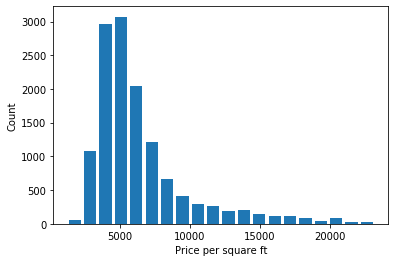

In [88]:
plt.hist(df2.pps, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')

plt.show()

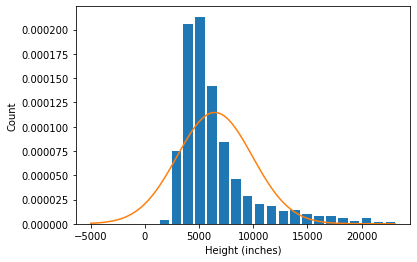

In [87]:
from scipy.stats import norm
import numpy as np

plt.hist(df2.pps, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df2.pps.max(), 100)
plt.plot(rng, norm.pdf(rng,df2.pps.mean(),df2.pps.std()))